# Data Loading

In [46]:
import numpy as np
import pandas as pd


folder = 'data/'

In [66]:
# data Section -1 The Basics:
MTeams = pd.read_csv(folder+'MTeams.csv')
WTeams = pd.read_csv(folder+'WTeams.csv')
MSeasons = pd.read_csv(folder+'MSeasons.csv')
WSeasons = pd.read_csv(folder+'WSeasons.csv')
MNCAATourneySeeds = pd.read_csv(folder+'MNCAATourneySeeds.csv')
WNCAATourneySeeds = pd.read_csv(folder+'WNCAATourneySeeds.csv')

# data Section -2 Team Box Scores:
MRegualarSeasonCompactResults = pd.read_csv(folder+'MRegularSeasonCompactResults.csv')
WRegualrSeasonCompactResults = pd.read_csv(folder+'WRegularSeasonCompactResults.csv')

MNCAATourneyCompactResults = pd.read_csv(folder+'MNCAATourneyCompactResults.csv')
WNCAATourneyCompactResults = pd.read_csv(folder+'WNCAATourneyCompactResults.csv')

MRegularSeasonDetailedResults = pd.read_csv(folder+'MRegularSeasonDetailedResults.csv')
WRegularSeasonDetailedResults = pd.read_csv(folder+'WRegularSeasonDetailedResults.csv')

MNCAATourneyDetailedResults = pd.read_csv(folder+'MNCAATourneyDetailedResults.csv')
WNCAATourneyDetailedResults = pd.read_csv(folder+'WNCAATourneyDetailedResults.csv')

#Data Section -3 Geography:
Cities = pd.read_csv(folder+'Cities.csv')

MGAameCities = pd.read_csv(folder+'MGameCities.csv')
WGameCities = pd.read_csv(folder+'WGameCities.csv')

#Data Section -4 Public Rankings:
MMasseyOrdinals = pd.read_csv(folder+'MMasseyOrdinals.csv')

#Data Section -5 Supplements:
MTeamCoaches = pd.read_csv(folder+'MTeamCoaches.csv')

Conferences = pd.read_csv(folder+'Conferences.csv')

MTeamConferences = pd.read_csv(folder+'MTeamConferences.csv')
WTeamConferences = pd.read_csv(folder+'WTeamConferences.csv')

MConferenceTourneyGames = pd.read_csv(folder+'MConferenceTourneyGames.csv')

MSecondaryTourneyTeams = pd.read_csv(folder+'MSecondaryTourneyTeams.csv')

MSecondaryTourneyCompactResults = pd.read_csv(folder+'MSecondaryTourneyCompactResults.csv')

MTeamSpellings = pd.read_csv(folder+'MTeamSpellings.csv', encoding='latin1')
WTeamSpellings = pd.read_csv(folder+'WTeamSpellings.csv', encoding='latin1')

MCAATourneySlots = pd.read_csv(folder+'MNCAATourneySlots.csv')
WCAATourneySlots = pd.read_csv(folder+'WNCAATourneySlots.csv')

MCAATourneySeedRoundSlots = pd.read_csv(folder+'MNCAATourneySeedRoundSlots.csv')

# Data Section -6 Others:
# tourney_seeds_2024 = pd.read_csv(folder+'tourney_seeds_2024.csv')


sample_submission = pd.read_csv(folder+'SampleSubmissionStage1.csv')

In [5]:
print(MRegularSeasonDetailedResults.columns.values)

['Season' 'DayNum' 'WTeamID' 'WScore' 'LTeamID' 'LScore' 'WLoc' 'NumOT'
 'WFGM' 'WFGA' 'WFGM3' 'WFGA3' 'WFTM' 'WFTA' 'WOR' 'WDR' 'WAst' 'WTO'
 'WStl' 'WBlk' 'WPF' 'LFGM' 'LFGA' 'LFGM3' 'LFGA3' 'LFTM' 'LFTA' 'LOR'
 'LDR' 'LAst' 'LTO' 'LStl' 'LBlk' 'LPF']


In [67]:
# For Regular Data
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'Loc', 'NumOT', 'FGM', 'FGA','FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF']
WinTeams[columns] = MRegularSeasonDetailedResults[['Season', 'WTeamID', 'WScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]


def change_loc_win(loc):
    if loc == 'H':
        return 1
    elif loc == 'A':
        return -1
    else:
        return 0
    

WinTeams['Loc'] = WinTeams['Loc'].apply(change_loc_win)

WinTeams['Result'] = 1

LoseTeams[columns] = MRegularSeasonDetailedResults[['Season', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]


def change_loc_lose(loc):
    if loc == 'H':
        return -1
    elif loc == 'A':
        return 1
    else:
        return 0
    
LoseTeams['Loc'] = LoseTeams['Loc'].apply(change_loc_lose)

LoseTeams['Result'] = 0

RegularTeams = pd.concat([WinTeams, LoseTeams])

display(RegularTeams.head())


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result
0,2003,1104,68,0,0,27,58,3,14,11,18,14,24,13,23,7,1,22,1
1,2003,1272,70,0,0,26,62,8,20,10,19,15,28,16,13,4,4,18,1
2,2003,1266,73,0,0,24,58,8,18,17,29,17,26,15,10,5,2,25,1
3,2003,1296,56,0,0,18,38,3,9,17,31,6,19,11,12,14,2,18,1
4,2003,1400,77,0,0,30,61,6,14,11,13,17,22,12,14,4,4,20,1


In [68]:
# For Tourney Data
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'Loc', 'NumOT', 'FGM', 'FGA','FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppID']

WinTeams[columns] = MNCAATourneyDetailedResults[['Season', 'WTeamID', 'WScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LTeamID']]

def change_loc_win(loc):
    if loc == 'H':
        return 1
    elif loc == 'A':
        return -1
    else:
        return 0
    

WinTeams['Loc'] = WinTeams['Loc'].apply(change_loc_win)

WinTeams['Result'] = 1


LoseTeams[columns] = MNCAATourneyDetailedResults[['Season', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WTeamID']]
def change_loc_lose(loc):
    if loc == 'H':
        return -1
    elif loc == 'A':
        return 1
    else:
        return 0
    
LoseTeams['Loc'] = LoseTeams['Loc'].apply(change_loc_lose)

LoseTeams['Result'] = 0

TourneyTeams = pd.concat([WinTeams, LoseTeams])

display(TourneyTeams.head())

,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppID,Result
0,2003,1421,92,0,1,32,69,11,29,17,26,14,30,17,12,5,3,22,1411,1
1,2003,1112,80,0,0,31,66,7,23,11,14,11,36,22,16,10,7,8,1436,1
2,2003,1113,84,0,0,31,59,6,14,16,22,10,27,18,9,7,4,19,1272,1
3,2003,1141,79,0,0,29,53,3,7,18,25,11,20,15,18,13,1,19,1166,1
4,2003,1143,76,0,1,27,64,7,20,15,23,18,20,17,13,8,2,14,1301,1


In [69]:
# Filter MTeams to get only teams with LastD1Season == 2025
valid_teams = set(MTeams[MTeams['LastD1Season'] == 2025]['TeamID'])

# Function to filter teams
def filter_teams(df):
    return df[df['TeamID'].isin(valid_teams)]

FilteredRegularTeams = pd.DataFrame()
FilteredTourneyTeams = pd.DataFrame()

# Apply filtering
FilteredRegularTeams = filter_teams(RegularTeams)
FilteredTourneyTeams = filter_teams(TourneyTeams)

display(FilteredRegularTeams)
display(FilteredTourneyTeams)

,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result
0,2003,1104,68,0,0,27,58,3,14,11,18,14,24,13,23,7,1,22,1
1,2003,1272,70,0,0,26,62,8,20,10,19,15,28,16,13,4,4,18,1
2,2003,1266,73,0,0,24,58,8,18,17,29,17,26,15,10,5,2,25,1
3,2003,1296,56,0,0,18,38,3,9,17,31,6,19,11,12,14,2,18,1
4,2003,1400,77,0,0,30,61,6,14,11,13,17,22,12,14,4,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,1102,62,-1,0,23,49,7,23,9,17,2,24,12,8,3,3,24,0
117744,2025,1139,63,-1,0,24,55,6,23,9,14,4,31,12,20,5,2,12,0
117745,2025,1480,62,-1,0,27,61,4,18,4,8,6,23,13,13,2,2,18,0
117746,2025,1122,68,-1,0,20,59,11,32,17,22,7,22,12,10,2,5,17,0


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppID,Result
0,2003,1421,92,0,1,32,69,11,29,17,26,14,30,17,12,5,3,22,1411,1
1,2003,1112,80,0,0,31,66,7,23,11,14,11,36,22,16,10,7,8,1436,1
2,2003,1113,84,0,0,31,59,6,14,16,22,10,27,18,9,7,4,19,1272,1
3,2003,1141,79,0,0,29,53,3,7,18,25,11,20,15,18,13,1,19,1166,1
4,2003,1143,76,0,1,27,64,7,20,15,23,18,20,17,13,8,2,14,1301,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,19,59,5,20,21,26,10,27,11,9,4,5,23,1301,0
1378,2024,1397,66,0,0,24,62,11,26,7,11,6,17,17,6,8,4,25,1345,0
1379,2024,1104,72,0,0,26,58,11,23,9,11,7,21,9,7,2,5,15,1163,0
1380,2024,1301,50,0,0,21,57,5,19,3,4,6,22,10,11,8,3,13,1345,0


In [70]:
# Adding seed to FilteredTourneyTeams
seed_dict = MNCAATourneySeeds.set_index(['Season', 'TeamID'])

# Add WinSeed and LoseSeed to FilteredTourneyTeams in columns called 'WinSeed' and 'LoseSeed'
def extract_seed(seed):
    if len(seed) == 4:
        return int(seed[1:-1])
    else:
        return int(seed[1:])

FilteredTourneyTeams.loc[:, 'TeamSeed'] = FilteredTourneyTeams.apply(lambda x: extract_seed(seed_dict.loc[(x['Season'], x['TeamID'])]['Seed']), axis=1)
FilteredTourneyTeams.loc[:, 'OppSeed'] = FilteredTourneyTeams.apply(lambda x: extract_seed(seed_dict.loc[(x['Season'], x['OppID'])]['Seed']), axis=1)

display(FilteredTourneyTeams)


C:\Users\ravit\AppData\Local\Temp\ipykernel_28136\1990882683.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FilteredTourneyTeams.loc[:, 'TeamSeed'] = FilteredTourneyTeams.apply(lambda x: extract_seed(seed_dict.loc[(x['Season'], x['TeamID'])]['Seed']), axis=1)
C:\Users\ravit\AppData\Local\Temp\ipykernel_28136\1990882683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FilteredTourneyTeams.loc[:, 'OppSeed'] = FilteredTourneyTeams.apply(lambda x: extract_seed(seed_dict.loc[(x['Season'], x['OppID'])][

,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,DR,Ast,TO,Stl,Blk,PF,OppID,Result,TeamSeed,OppSeed
0,2003,1421,92,0,1,32,69,11,29,17,...,30,17,12,5,3,22,1411,1,16,16
1,2003,1112,80,0,0,31,66,7,23,11,...,36,22,16,10,7,8,1436,1,1,16
2,2003,1113,84,0,0,31,59,6,14,16,...,27,18,9,7,4,19,1272,1,10,7
3,2003,1141,79,0,0,29,53,3,7,18,...,20,15,18,13,1,19,1166,1,11,6
4,2003,1143,76,0,1,27,64,7,20,15,...,20,17,13,8,2,14,1301,1,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,19,59,5,20,21,...,27,11,9,4,5,23,1301,0,4,11
1378,2024,1397,66,0,0,24,62,11,26,7,...,17,17,6,8,4,25,1345,0,2,1
1379,2024,1104,72,0,0,26,58,11,23,9,...,21,9,7,2,5,15,1163,0,4,1
1380,2024,1301,50,0,0,21,57,5,19,3,...,22,10,11,8,3,13,1345,0,11,1


In [71]:
# From FilteredTourneyTeams add a new column to it called SeedDiff where SeedDiff =  TeamSeed - OppSeed
FilteredTourneyTeams.loc[:, 'SeedDiff'] = FilteredTourneyTeams['TeamSeed'] - FilteredTourneyTeams['OppSeed']

display(FilteredTourneyTeams)

C:\Users\ravit\AppData\Local\Temp\ipykernel_28136\2273585551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FilteredTourneyTeams.loc[:, 'SeedDiff'] = FilteredTourneyTeams['TeamSeed'] - FilteredTourneyTeams['OppSeed']


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,Ast,TO,Stl,Blk,PF,OppID,Result,TeamSeed,OppSeed,SeedDiff
0,2003,1421,92,0,1,32,69,11,29,17,...,17,12,5,3,22,1411,1,16,16,0
1,2003,1112,80,0,0,31,66,7,23,11,...,22,16,10,7,8,1436,1,1,16,-15
2,2003,1113,84,0,0,31,59,6,14,16,...,18,9,7,4,19,1272,1,10,7,3
3,2003,1141,79,0,0,29,53,3,7,18,...,15,18,13,1,19,1166,1,11,6,5
4,2003,1143,76,0,1,27,64,7,20,15,...,17,13,8,2,14,1301,1,8,9,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,19,59,5,20,21,...,11,9,4,5,23,1301,0,4,11,-7
1378,2024,1397,66,0,0,24,62,11,26,7,...,17,6,8,4,25,1345,0,2,1,1
1379,2024,1104,72,0,0,26,58,11,23,9,...,9,7,2,5,15,1163,0,4,1,3
1380,2024,1301,50,0,0,21,57,5,19,3,...,10,11,8,3,13,1345,0,11,1,10


In [72]:
# From FilteredTourneyTeams drop OppID TeamSeed and OppSeed
FilteredTourneyTeams = FilteredTourneyTeams.drop(columns=['OppID', 'TeamSeed', 'OppSeed'])

display(FilteredTourneyTeams)

,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff
0,2003,1421,92,0,1,32,69,11,29,17,26,14,30,17,12,5,3,22,1,0
1,2003,1112,80,0,0,31,66,7,23,11,14,11,36,22,16,10,7,8,1,-15
2,2003,1113,84,0,0,31,59,6,14,16,22,10,27,18,9,7,4,19,1,3
3,2003,1141,79,0,0,29,53,3,7,18,25,11,20,15,18,13,1,19,1,5
4,2003,1143,76,0,1,27,64,7,20,15,23,18,20,17,13,8,2,14,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,19,59,5,20,21,26,10,27,11,9,4,5,23,0,-7
1378,2024,1397,66,0,0,24,62,11,26,7,11,6,17,17,6,8,4,25,0,1
1379,2024,1104,72,0,0,26,58,11,23,9,11,7,21,9,7,2,5,15,0,3
1380,2024,1301,50,0,0,21,57,5,19,3,4,6,22,10,11,8,3,13,0,10


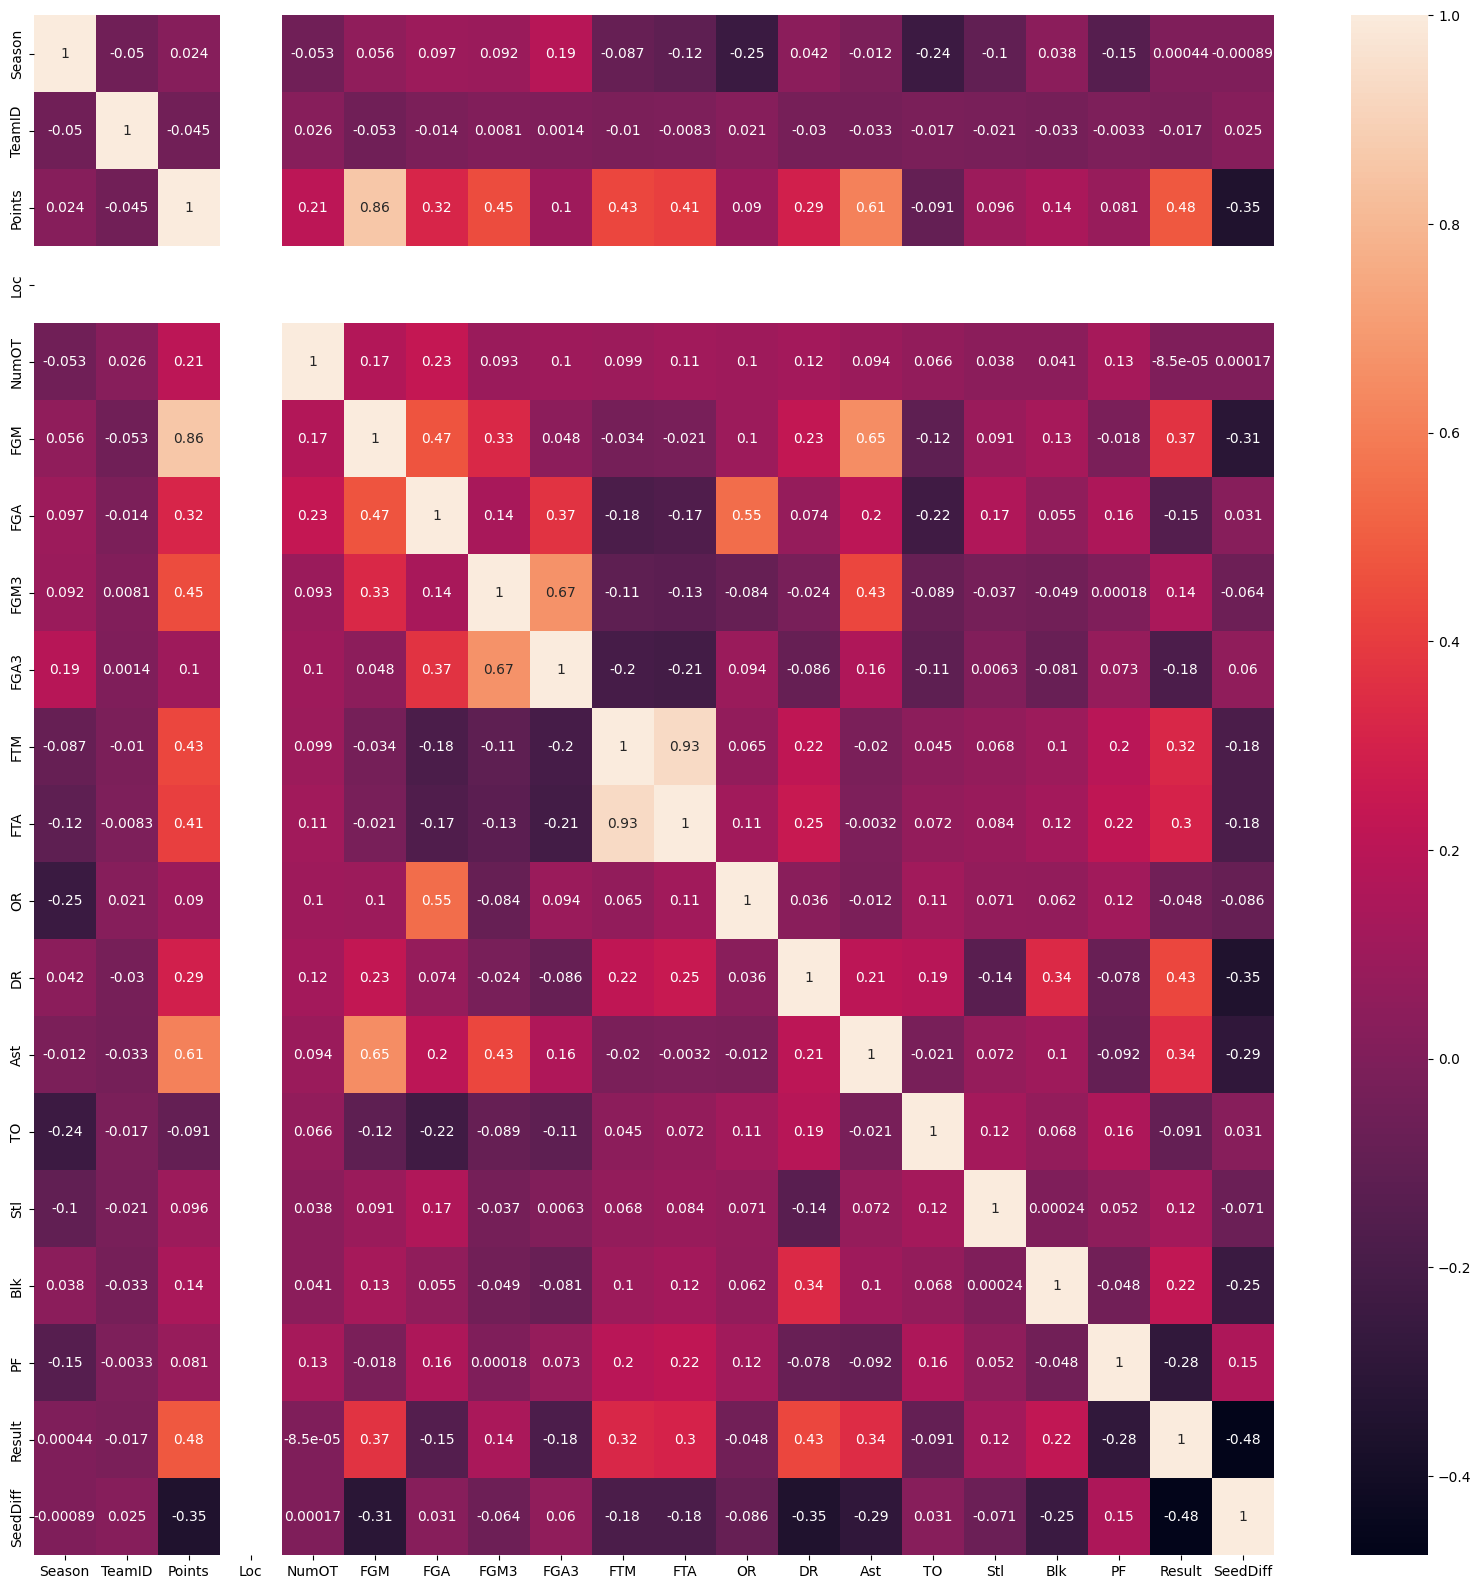

In [73]:
# See corealtion between Result and all other columns in FilteredTourneysTeams in heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(FilteredTourneyTeams.corr(), annot=True)
plt.show()

# From FilteredTourneyTeams drop columns that have correlation less than 0.1 with Result
# FilteredTourneyTeams = FilteredTourneyTeams.drop(columns=['NumOT', 'Loc', 'FGA', 'FGA3', 'FTA', 'OR', 'DR', 'PF'])

In [74]:
# to FilteredRegularTeams add a new column called SeedDiff and default it's value to 0
FilteredRegularTeams.loc[:, 'SeedDiff'] = 0

display(FilteredRegularTeams)

C:\Users\ravit\AppData\Local\Temp\ipykernel_28136\3009541260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FilteredRegularTeams.loc[:, 'SeedDiff'] = 0


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff
0,2003,1104,68,0,0,27,58,3,14,11,18,14,24,13,23,7,1,22,1,0
1,2003,1272,70,0,0,26,62,8,20,10,19,15,28,16,13,4,4,18,1,0
2,2003,1266,73,0,0,24,58,8,18,17,29,17,26,15,10,5,2,25,1,0
3,2003,1296,56,0,0,18,38,3,9,17,31,6,19,11,12,14,2,18,1,0
4,2003,1400,77,0,0,30,61,6,14,11,13,17,22,12,14,4,4,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,1102,62,-1,0,23,49,7,23,9,17,2,24,12,8,3,3,24,0,0
117744,2025,1139,63,-1,0,24,55,6,23,9,14,4,31,12,20,5,2,12,0,0
117745,2025,1480,62,-1,0,27,61,4,18,4,8,6,23,13,13,2,2,18,0,0
117746,2025,1122,68,-1,0,20,59,11,32,17,22,7,22,12,10,2,5,17,0,0


In [75]:
# Add a column called TotalGames to FilteredRegularTeams where it tells total number of games played by a team in a season
def get_total_games_played(df):
    return df.groupby(['Season', 'TeamID']).size().reset_index(name='TotalGames')

total_games = get_total_games_played(FilteredRegularTeams)
FilteredRegularTeams = pd.merge(FilteredRegularTeams, total_games, on=['Season', 'TeamID'])

display(FilteredRegularTeams)



,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,TotalGames
0,2003,1104,68,0,0,27,58,3,14,11,...,14,24,13,23,7,1,22,1,0,28
1,2003,1272,70,0,0,26,62,8,20,10,...,15,28,16,13,4,4,18,1,0,29
2,2003,1266,73,0,0,24,58,8,18,17,...,17,26,15,10,5,2,25,1,0,28
3,2003,1296,56,0,0,18,38,3,9,17,...,6,19,11,12,14,2,18,1,0,31
4,2003,1400,77,0,0,30,61,6,14,11,...,17,22,12,14,4,4,20,1,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233291,2025,1102,62,-1,0,23,49,7,23,9,...,2,24,12,8,3,3,24,0,0,26
233292,2025,1139,63,-1,0,24,55,6,23,9,...,4,31,12,20,5,2,12,0,0,26
233293,2025,1480,62,-1,0,27,61,4,18,4,...,6,23,13,13,2,2,18,0,0,27
233294,2025,1122,68,-1,0,20,59,11,32,17,...,7,22,12,10,2,5,17,0,0,26


In [76]:
# Add a column called TotalGames to FilteredTourneyTeams where it tells total number of games played by a team in a season
def get_total_games_played(df):
    return df.groupby(['Season', 'TeamID']).size().reset_index(name='TotalGames')

total_games = get_total_games_played(FilteredTourneyTeams)
FilteredTourneyTeams = pd.merge(FilteredTourneyTeams, total_games, on=['Season', 'TeamID'])

display(FilteredTourneyTeams)


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,TotalGames
0,2003,1421,92,0,1,32,69,11,29,17,...,14,30,17,12,5,3,22,1,0,2
1,2003,1112,80,0,0,31,66,7,23,11,...,11,36,22,16,10,7,8,1,-15,4
2,2003,1113,84,0,0,31,59,6,14,16,...,10,27,18,9,7,4,19,1,3,2
3,2003,1141,79,0,0,29,53,3,7,18,...,11,20,15,18,13,1,19,1,5,2
4,2003,1143,76,0,1,27,64,7,20,15,...,18,20,17,13,8,2,14,1,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,2024,1181,64,0,0,19,59,5,20,21,...,10,27,11,9,4,5,23,0,-7,4
2759,2024,1397,66,0,0,24,62,11,26,7,...,6,17,17,6,8,4,25,0,1,4
2760,2024,1104,72,0,0,26,58,11,23,9,...,7,21,9,7,2,5,15,0,3,5
2761,2024,1301,50,0,0,21,57,5,19,3,...,6,22,10,11,8,3,13,0,10,5


In [ ]:
print(FilteredRegularTeams.columns.values)
print(FilteredTourneyTeams.columns.values)


['Season' 'TeamID' 'Points' 'Loc' 'NumOT' 'FGM' 'FGA' 'FGM3' 'FGA3' 'FTM'
 'FTA' 'OR' 'DR' 'Ast' 'TO' 'Stl' 'Blk' 'PF' 'Result' 'SeedDiff'
 'TotalGames']
['Season' 'TeamID' 'Points' 'Loc' 'NumOT' 'FGM' 'FGA' 'FGM3' 'FGA3' 'FTM'
 'FTA' 'OR' 'DR' 'Ast' 'TO' 'Stl' 'Blk' 'PF' 'Result' 'SeedDiff'
 'TotalGames']


In [77]:
# Cell 2: Feature Engineering (Calculate Percentages)
FilteredRegularTeams['FGP'] = FilteredRegularTeams['FGM'] / FilteredRegularTeams['FGA']
FilteredRegularTeams['FG3P'] = FilteredRegularTeams['FGM3'] / FilteredRegularTeams['FGA3']
FilteredRegularTeams['FTP'] = FilteredRegularTeams['FTM'] / FilteredRegularTeams['FTA']

FilteredTourneyTeams['FGP'] = FilteredTourneyTeams['FGM'] / FilteredTourneyTeams['FGA']
FilteredTourneyTeams['FG3P'] = FilteredTourneyTeams['FGM3'] / FilteredTourneyTeams['FGA3']
FilteredTourneyTeams['FTP'] = FilteredTourneyTeams['FTM'] / FilteredTourneyTeams['FTA']

# Handle division by zero errors, if any.
FilteredRegularTeams.replace([float('inf'), float('-inf')], 0, inplace=True)
FilteredRegularTeams.fillna(0, inplace=True)

FilteredTourneyTeams.replace([float('inf'), float('-inf')], 0, inplace=True)
FilteredTourneyTeams.fillna(0, inplace=True)

print("\nFeature Engineering Completed.")

display(FilteredRegularTeams)
display(FilteredTourneyTeams)


Feature Engineering Completed.


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,TO,Stl,Blk,PF,Result,SeedDiff,TotalGames,FGP,FG3P,FTP
0,2003,1104,68,0,0,27,58,3,14,11,...,23,7,1,22,1,0,28,0.465517,0.214286,0.611111
1,2003,1272,70,0,0,26,62,8,20,10,...,13,4,4,18,1,0,29,0.419355,0.400000,0.526316
2,2003,1266,73,0,0,24,58,8,18,17,...,10,5,2,25,1,0,28,0.413793,0.444444,0.586207
3,2003,1296,56,0,0,18,38,3,9,17,...,12,14,2,18,1,0,31,0.473684,0.333333,0.548387
4,2003,1400,77,0,0,30,61,6,14,11,...,14,4,4,20,1,0,28,0.491803,0.428571,0.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233291,2025,1102,62,-1,0,23,49,7,23,9,...,8,3,3,24,0,0,26,0.469388,0.304348,0.529412
233292,2025,1139,63,-1,0,24,55,6,23,9,...,20,5,2,12,0,0,26,0.436364,0.260870,0.642857
233293,2025,1480,62,-1,0,27,61,4,18,4,...,13,2,2,18,0,0,27,0.442623,0.222222,0.500000
233294,2025,1122,68,-1,0,20,59,11,32,17,...,10,2,5,17,0,0,26,0.338983,0.343750,0.772727


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,TO,Stl,Blk,PF,Result,SeedDiff,TotalGames,FGP,FG3P,FTP
0,2003,1421,92,0,1,32,69,11,29,17,...,12,5,3,22,1,0,2,0.463768,0.379310,0.653846
1,2003,1112,80,0,0,31,66,7,23,11,...,16,10,7,8,1,-15,4,0.469697,0.304348,0.785714
2,2003,1113,84,0,0,31,59,6,14,16,...,9,7,4,19,1,3,2,0.525424,0.428571,0.727273
3,2003,1141,79,0,0,29,53,3,7,18,...,18,13,1,19,1,5,2,0.547170,0.428571,0.720000
4,2003,1143,76,0,1,27,64,7,20,15,...,13,8,2,14,1,-1,2,0.421875,0.350000,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,2024,1181,64,0,0,19,59,5,20,21,...,9,4,5,23,0,-7,4,0.322034,0.250000,0.807692
2759,2024,1397,66,0,0,24,62,11,26,7,...,6,8,4,25,0,1,4,0.387097,0.423077,0.636364
2760,2024,1104,72,0,0,26,58,11,23,9,...,7,2,5,15,0,3,5,0.448276,0.478261,0.818182
2761,2024,1301,50,0,0,21,57,5,19,3,...,11,8,3,13,0,10,5,0.368421,0.263158,0.750000


In [78]:
# From both FilteredRegularTeams and FilteredTourneyTeams drop columns ['FGM', 'FGA', 'FGM3', 'FGA
# 'FTM', 'FTA'] as they are not needed anymore
FilteredRegularTeams = FilteredRegularTeams.drop(columns=['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA'])
FilteredTourneyTeams = FilteredTourneyTeams.drop(columns=['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA'])

display(FilteredRegularTeams)
display(FilteredTourneyTeams)

,Season,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,TotalGames,FGP,FG3P,FTP
0,2003,1104,68,0,0,14,24,13,23,7,1,22,1,0,28,0.465517,0.214286,0.611111
1,2003,1272,70,0,0,15,28,16,13,4,4,18,1,0,29,0.419355,0.400000,0.526316
2,2003,1266,73,0,0,17,26,15,10,5,2,25,1,0,28,0.413793,0.444444,0.586207
3,2003,1296,56,0,0,6,19,11,12,14,2,18,1,0,31,0.473684,0.333333,0.548387
4,2003,1400,77,0,0,17,22,12,14,4,4,20,1,0,28,0.491803,0.428571,0.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233291,2025,1102,62,-1,0,2,24,12,8,3,3,24,0,0,26,0.469388,0.304348,0.529412
233292,2025,1139,63,-1,0,4,31,12,20,5,2,12,0,0,26,0.436364,0.260870,0.642857
233293,2025,1480,62,-1,0,6,23,13,13,2,2,18,0,0,27,0.442623,0.222222,0.500000
233294,2025,1122,68,-1,0,7,22,12,10,2,5,17,0,0,26,0.338983,0.343750,0.772727


,Season,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,TotalGames,FGP,FG3P,FTP
0,2003,1421,92,0,1,14,30,17,12,5,3,22,1,0,2,0.463768,0.379310,0.653846
1,2003,1112,80,0,0,11,36,22,16,10,7,8,1,-15,4,0.469697,0.304348,0.785714
2,2003,1113,84,0,0,10,27,18,9,7,4,19,1,3,2,0.525424,0.428571,0.727273
3,2003,1141,79,0,0,11,20,15,18,13,1,19,1,5,2,0.547170,0.428571,0.720000
4,2003,1143,76,0,1,18,20,17,13,8,2,14,1,-1,2,0.421875,0.350000,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,2024,1181,64,0,0,10,27,11,9,4,5,23,0,-7,4,0.322034,0.250000,0.807692
2759,2024,1397,66,0,0,6,17,17,6,8,4,25,0,1,4,0.387097,0.423077,0.636364
2760,2024,1104,72,0,0,7,21,9,7,2,5,15,0,3,5,0.448276,0.478261,0.818182
2761,2024,1301,50,0,0,6,22,10,11,8,3,13,0,10,5,0.368421,0.263158,0.750000


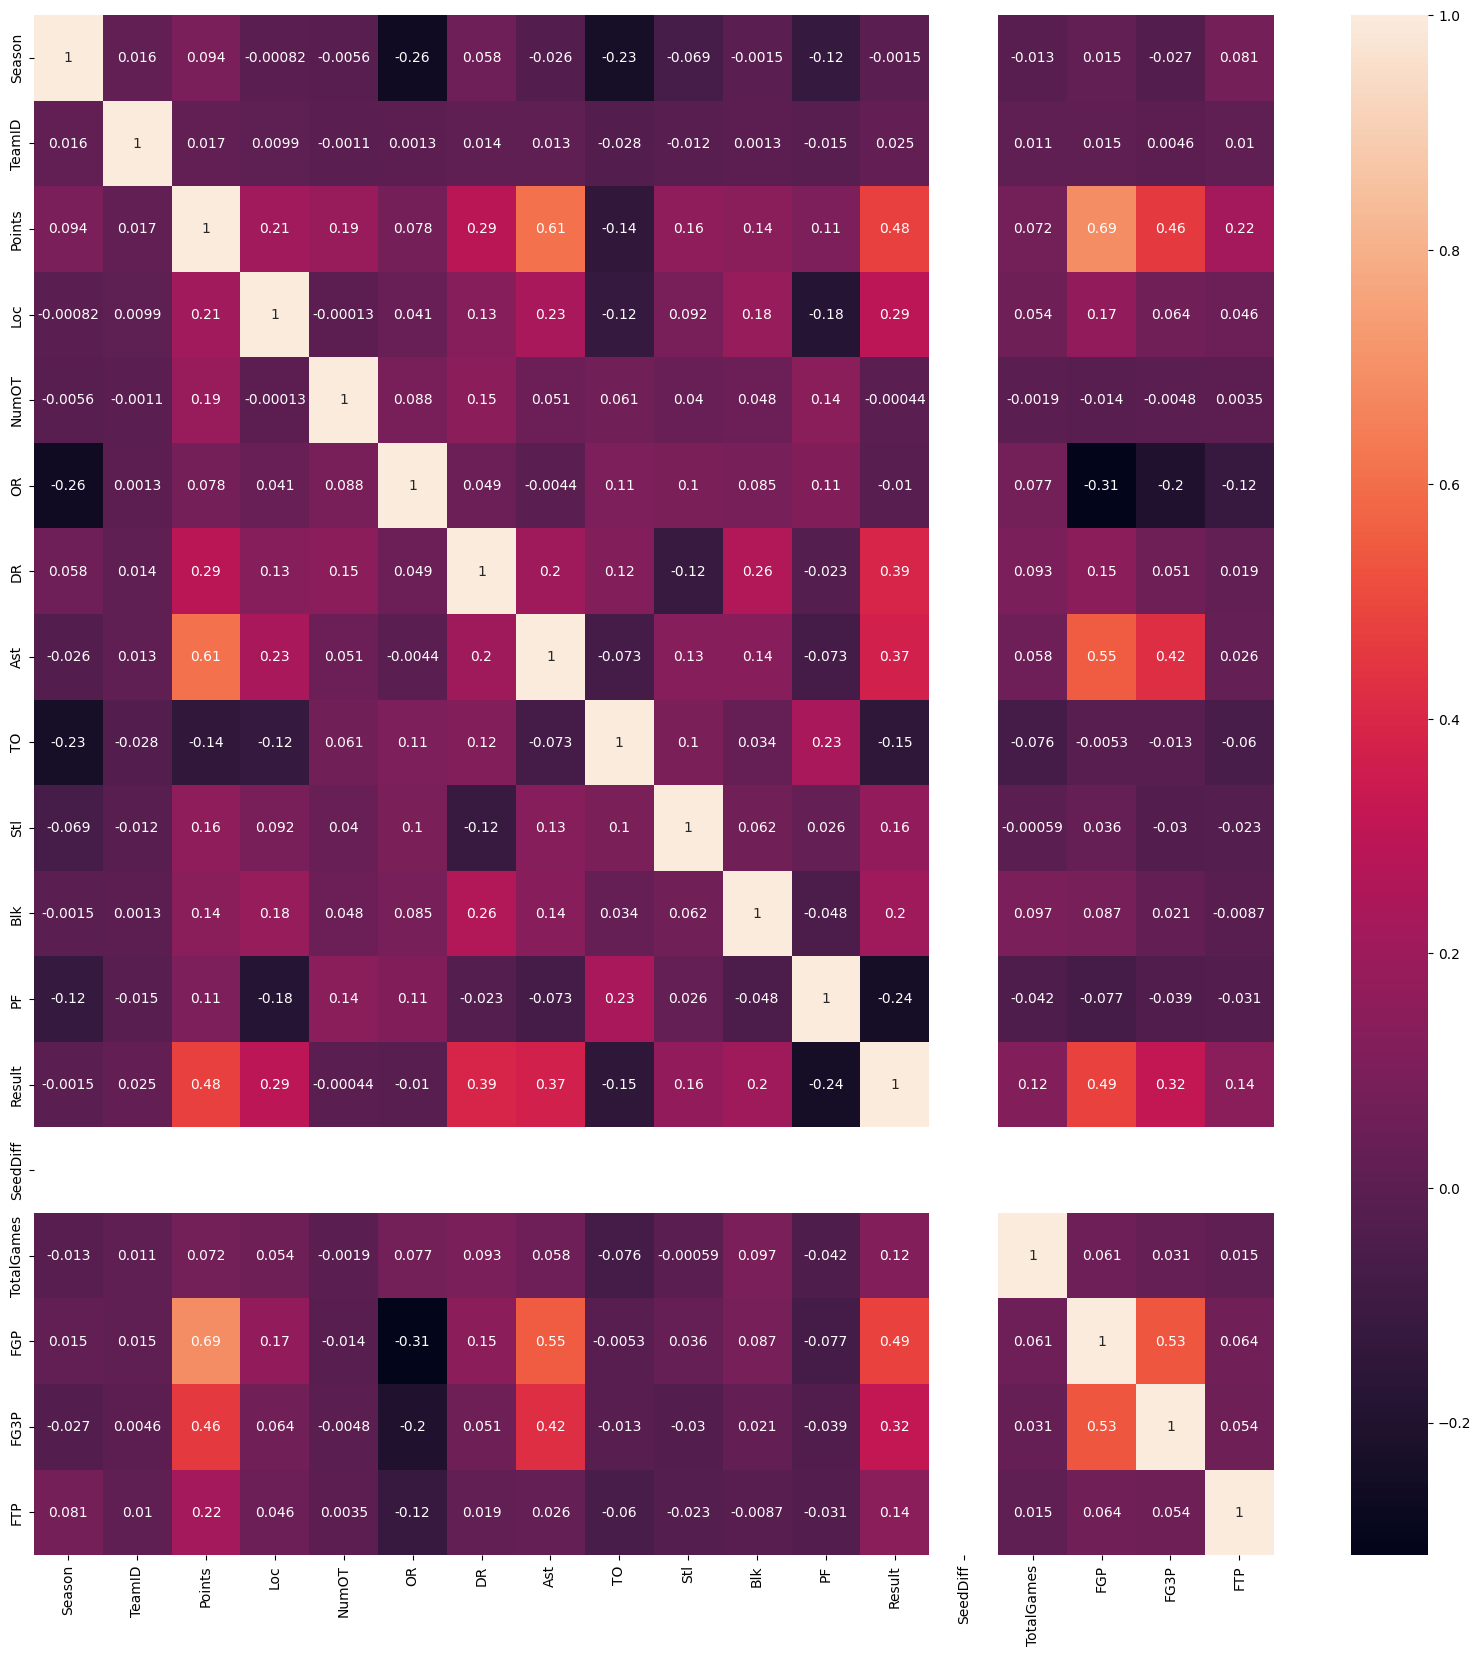

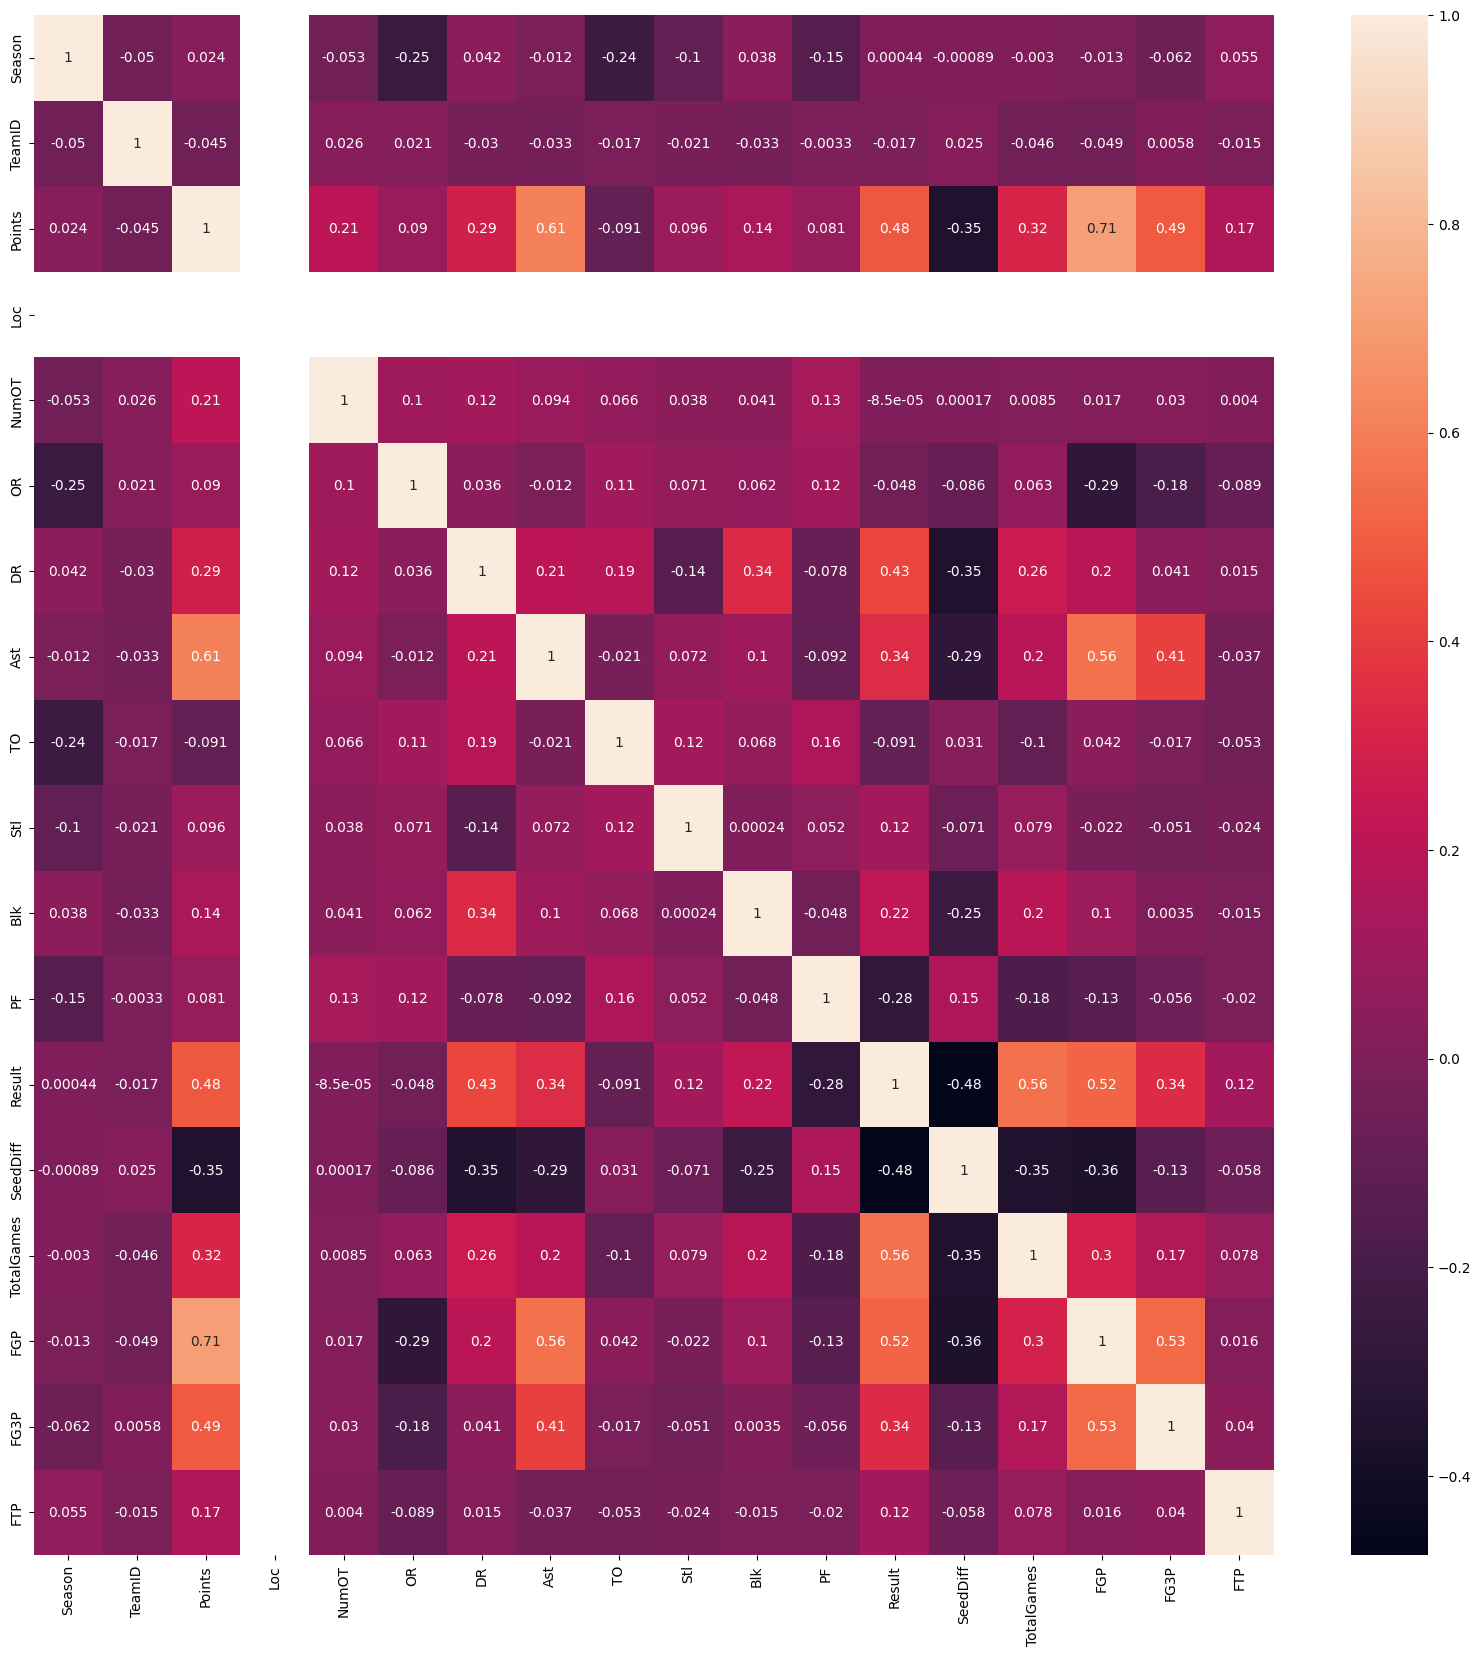

In [79]:
#Check the corelation between columns in FilteredRegularTeams and FilteredTourneyTeams
plt.figure(figsize=(20, 20))
sns.heatmap(FilteredRegularTeams.corr(), annot=True)
plt.show()

plt.figure(figsize=(20, 20))
sns.heatmap(FilteredTourneyTeams.corr(), annot=True)
plt.show()

In [81]:
print(FilteredRegularTeams.columns.values)
print(FilteredTourneyTeams.columns.values)

['Season' 'TeamID' 'Points' 'Loc' 'NumOT' 'OR' 'DR' 'Ast' 'TO' 'Stl' 'Blk'
 'PF' 'Result' 'SeedDiff' 'TotalGames' 'FGP' 'FG3P' 'FTP']
['Season' 'TeamID' 'Points' 'Loc' 'NumOT' 'OR' 'DR' 'Ast' 'TO' 'Stl' 'Blk'
 'PF' 'Result' 'SeedDiff' 'TotalGames' 'FGP' 'FG3P' 'FTP']


In [82]:
# concat both FilteredRegularTeams and FilteredTourneyTeams
FilteredTeams = pd.concat([FilteredRegularTeams, FilteredTourneyTeams])

In [83]:
# Divide the data set into test and train data sets before that randomize the columns
FilteredTeams = FilteredTeams.sample(frac=1).reset_index(drop=True)

# Split the data into train and test data
train_data = FilteredTeams[FilteredTeams['Season'] < 2025]
test_data = FilteredTeams[FilteredTeams['Season'] == 2025]

# Drop Season column from both train and test data
train_data = train_data.drop(columns=['Season'])
test_data = test_data.drop(columns=['Season'])

display(train_data)
display(test_data)

,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,TotalGames,FGP,FG3P,FTP
0,1451,69,0,0,8,34,14,14,4,1,21,1,0,28,0.395833,0.291667,0.705882
1,1338,62,1,0,6,16,12,3,4,4,19,0,0,32,0.396226,0.307692,0.888889
2,1279,64,1,0,9,16,14,10,8,3,17,1,0,28,0.466667,0.235294,0.692308
3,1234,75,1,1,9,31,18,15,8,2,16,0,0,32,0.421875,0.259259,0.823529
4,1357,67,-1,0,19,30,8,25,2,1,21,0,0,32,0.301587,0.173913,0.961538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236054,1320,65,-1,0,11,19,13,13,5,1,15,0,0,30,0.367347,0.360000,0.909091
236055,1188,62,-1,0,7,16,7,17,5,0,15,0,0,25,0.387755,0.285714,0.750000
236056,1249,77,-1,0,18,30,12,11,8,13,18,1,0,27,0.400000,0.181818,0.739130
236057,1358,58,0,0,9,22,14,12,5,4,20,1,0,31,0.500000,0.466667,0.555556


,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,TotalGames,FGP,FG3P,FTP
27,1460,77,-1,0,8,23,10,7,8,3,24,0,0,26,0.478261,0.250000,0.636364
68,1335,47,-1,0,4,19,9,15,7,0,14,0,0,22,0.360000,0.185185,0.857143
79,1455,79,1,0,11,26,10,8,6,2,13,1,0,24,0.428571,0.400000,0.791667
92,1161,68,1,0,12,23,19,17,9,6,9,0,0,26,0.450000,0.260870,1.000000
100,1129,66,1,0,5,19,13,10,5,0,19,1,0,24,0.408163,0.320000,0.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235915,1313,92,1,0,5,21,15,14,10,2,14,1,0,23,0.618182,0.380952,0.761905
235976,1369,56,1,0,3,15,10,9,8,3,12,0,0,24,0.415094,0.277778,0.636364
236011,1392,66,1,0,5,21,7,10,3,3,14,0,0,26,0.444444,0.347826,0.818182
236036,1108,59,-1,0,13,12,9,14,7,1,19,0,0,25,0.363636,0.272727,0.727273


In [84]:
# Apply the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = train_data.drop(columns=['Result'])
y_train = train_data['Result']

X_test = test_data.drop(columns=['Result'])
y_test = test_data['Result']

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.8234967827823386


In [85]:
# Apply GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.8433547814510761
